# Reto: Entregable #1
### Limpieza y procesamiento de datos

| Integrantes        | Matricula            |
|---------------|---------------|
| Ana Lucía Cárdenas Pérez      | A01284090          |
| Elías Garza Valdés      | A01284041          |
| Diego Elián Rodríguez Cantú      | A00829925          |
| José Edmundo Romo Castillo           | A01197772           |


In [82]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

### Lectura y revisión de datos

In [84]:
train = pd.read_csv("../Data/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


La base de datos contiene la información de los pasajeros del Titanic de 1912, embarcación que terminó siendo hundida por su colisión con un iceberg. En la base se tienen diversos datos entre ellos la clasificación de si este viajero sobrevivió al accidente o falleció. Entre las demás variables disponibles se encuentran:

1. **PassengerId** [int]: Es un identificador único asignado a cada pasajero.

2. **Survived** [bool]: Indica si el pasajero sobrevivió o no al naufragio. Un valor de 0 significa que no sobrevivió, y un valor de 1 significa que sí sobrevivió.

3. **Pclass (Passenger Class)** [int]: Representa la clase en la que el pasajero viajaba. Puede tener los valores 1 (primera clase), 2 (segunda clase) o 3 (tercera clase).

4. **Name** [str]: El nombre del pasajero.

5. **Sex** [str]: El género del pasajero, que puede ser 'male' (hombre) o 'female' (mujer).

6. **Age** [float]: La edad del pasajero en años. Algunas edades pueden estar representadas como fracciones si los pasajeros eran bebés.

7. **SibSp (Siblings/Spouses Aboard)** [int]: El número de hermanos o cónyuges que el pasajero tenía a bordo.

8. **Parch (Parents/Children Aboard)** [int]: El número de padres o hijos que el pasajero tenía a bordo.

9. **Ticket** [str]: El número de la boletería del pasajero.

10. **Fare** [float]: El precio del boleto que el pasajero pagó.

11. **Cabin** [str]: El número de cabina en la que el pasajero estaba alojado. Algunos valores pueden estar ausentes debido a la falta de registros.

12. **Embarked** [char]: El puerto donde el pasajero embarcó. Puede tener los valores 'C' (Cherbourg), 'Q' (Queenstown) o 'S' (Southampton).

Cabe mencionar que además de estas columnas principales, puede haber otras columnas secundarias en la base de datos con información adicional, pero estas son las principales que se utilizan comúnmente en análisis y modelado predictivo.

## Limpieza y transformación de variables

Para la exploración inicial se revisará los tipos de datos y sus valores faltantes.

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


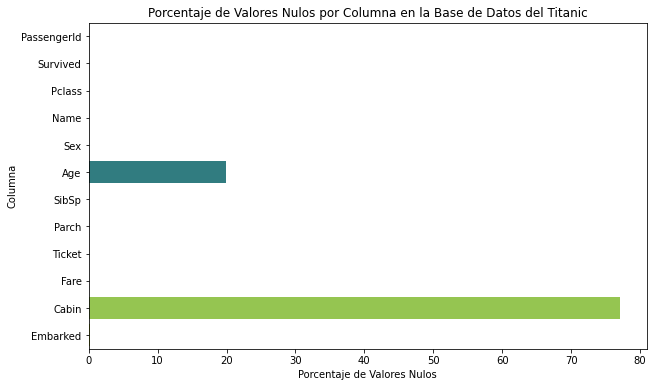

In [86]:
null_percentages = (train.isnull().sum() / len(train)) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=null_percentages.values, y=null_percentages.index, palette='viridis')
plt.xlabel('Porcentaje de Valores Nulos')
plt.ylabel('Columna')
plt.title('Porcentaje de Valores Nulos por Columna en la Base de Datos del Titanic')
plt.show()

Quitando las columnas de `Cabin`, `Passenger Id`, `Ticket`, `Name`. Esto por las razones siguientes:


**Passenger Id**: Este es un número que no solo explica el orden en el que estan las personas y no guarda ninguna relación con la supervivencia. 

**Cabin**: Hay una cantidad considerable de datos nulos por lo que no vamos a usar esta columna. Es posible que en un futuro se pruebe tranformar la columna a binario separando a todos los que tienen cabina y los que no pero eso sera ya viendo las pruebas de los modelos. 

**Name**: En principio, el nombre no hace que tu supervivencia suba o baje. Sin embargo quisieramos dejar la posibilidad de agrupar a las personas por apellido ya que es probable que las familias se muevan juntas asi que su supervivencia puede estar agrupada. Sin embargo, esto se hara en un futuro si se considera necesario. 

**Ticket**: Sucede algo similar que con el nombre. En un principio no deberia afectar la supervivencia pero las personas que compraron boletos consecutivos es probable que sean conocidos o amigos por lo que podrían ir juntos en el barco al momento de evacuar. 

In [87]:
train = train.drop(columns = ['Cabin', 'PassengerId', 'Ticket', 'Name'])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [88]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## Transformación de datos

Podemos quitar algunos outliers. Sin embargo, si vemos los diagramas de caja podemos observar que los valores atipicos importantes estan en edad y costo del boleto y no consideramos que estos sean valores verdaderamente atipicos. En el caso de la edad es muy posible que haya pesonas mayores que haya que considerar y tambien eliminar a el grupo de personas que pago considerablemente más esta mal ya que justo son un grupo importante a considerar. De hecho pueden ser atipicos porque son menos la cantidad de personas de clase alta pero es importante para la supervicencia este factor. 

<AxesSubplot:>

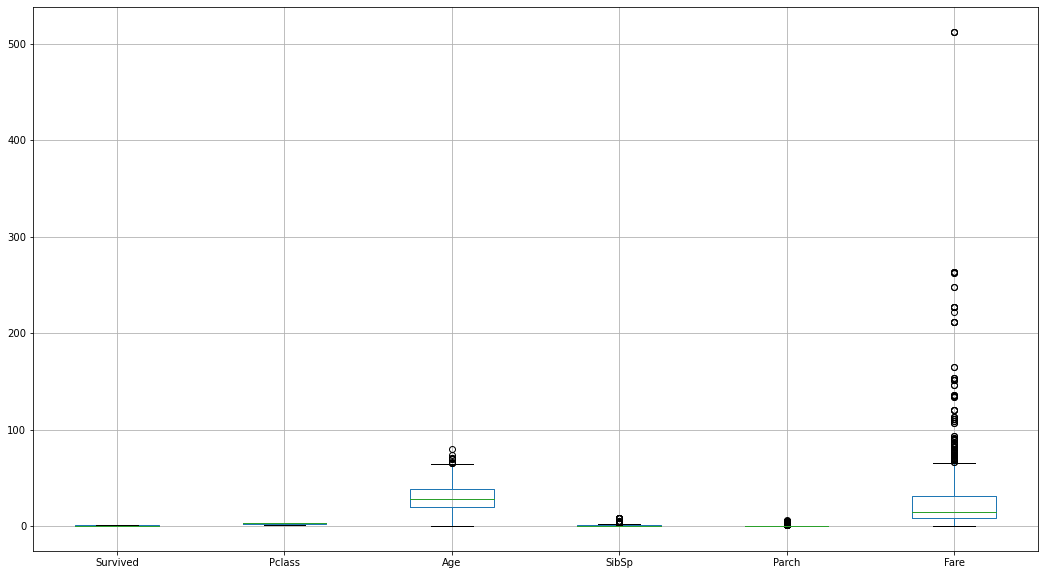

In [89]:
train.boxplot(figsize=(18,10))

En cualquier caso, si se quiere quitar estos valores con esta función se puede hacer sin problema.

In [90]:
def remove_outliers(df : pd.DataFrame(), rango : float, columna :  str):
    # Select only numeric columns
    df_c = df[[columna]]
    numeric_cols = df_c.select_dtypes(include=['number'])

    # Calculate Q1, Q3, and IQR for numeric columns
    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1

    # Apply the filter only to numeric columns
    mask = ~((numeric_cols < (Q1 - rango * IQR)) | (numeric_cols > (Q3 + rango * IQR))).any(axis=1)

    # Create a new DataFrame using the filter condition
    return df[mask]


Es de interés remover los registros que tienen un valor de `Fare` muy por arriba de la media. En la gráfica podemos notar como hay unos registros puntuales incluso por encima de 500 los cuales se consideran podría afectar en los cálculos de las medias y generar más ruido en los modelos que ayudar.

In [91]:
train[train['Fare']== train['Fare'].max()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C


Son 3 registros con el valor de `Fare` que se desea remover.

<AxesSubplot:>

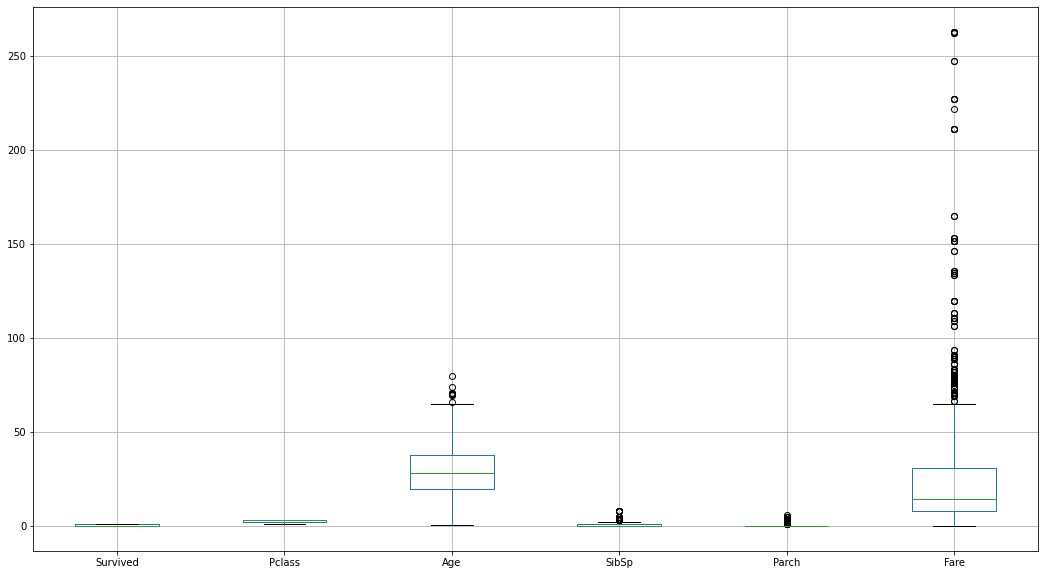

In [92]:
train = remove_outliers(train, 13, 'Fare')
train.boxplot(figsize=(18,10))

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  888 non-null    int64  
 1   Pclass    888 non-null    int64  
 2   Sex       888 non-null    object 
 3   Age       711 non-null    float64
 4   SibSp     888 non-null    int64  
 5   Parch     888 non-null    int64  
 6   Fare      888 non-null    float64
 7   Embarked  886 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.4+ KB


Tenemos algunos datos faltantes en la variable de edad y la variable de Embarked. No queremos perder esos datos por lo que en el caso de la variable edad la rellenaremos con el promedio de la columna. Tal vez en un futuro utilizaremos una técnica más especifica como un promedio sobre los grupos por k-nearest-neighbors para rellenar con el promedio de grupos similares pero por el momento solo utilizaremos el promedio de toda la columna. 

Por parte de la variable de Embarked usaremos la moda, aunque también se podría usar el método de KNN mencionado.

In [94]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Age'] = train['Age'].fillna(train['Age'].mean())
print(train.info())
display(train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  888 non-null    int64  
 1   Pclass    888 non-null    int64  
 2   Sex       888 non-null    object 
 3   Age       888 non-null    float64
 4   SibSp     888 non-null    int64  
 5   Parch     888 non-null    int64  
 6   Fare      888 non-null    float64
 7   Embarked  888 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.4+ KB
None


C:\Users\elian\AppData\Local\Temp\ipykernel_14752\733535143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
C:\Users\elian\AppData\Local\Temp\ipykernel_14752\733535143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'] = train['Age'].fillna(train['Age'].mean())


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.675345,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


Los modelos que vamos a utilizar necesitan valores numericos por lo que vamos a codificar las variables categóricas. En este caso utilizaremos un One-Hot encoding para generar las columnas necesarias para las variables `Embarked` y `Sex`. 

In [95]:
train = pd.get_dummies(train, columns=['Embarked'])
train['is_male'] = pd.get_dummies(train['Sex'])['male']
train = train.drop(columns='Sex')
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,is_male
0,0,3,22.0,1,0,7.2500,0,0,1,1
1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,1


<AxesSubplot:>

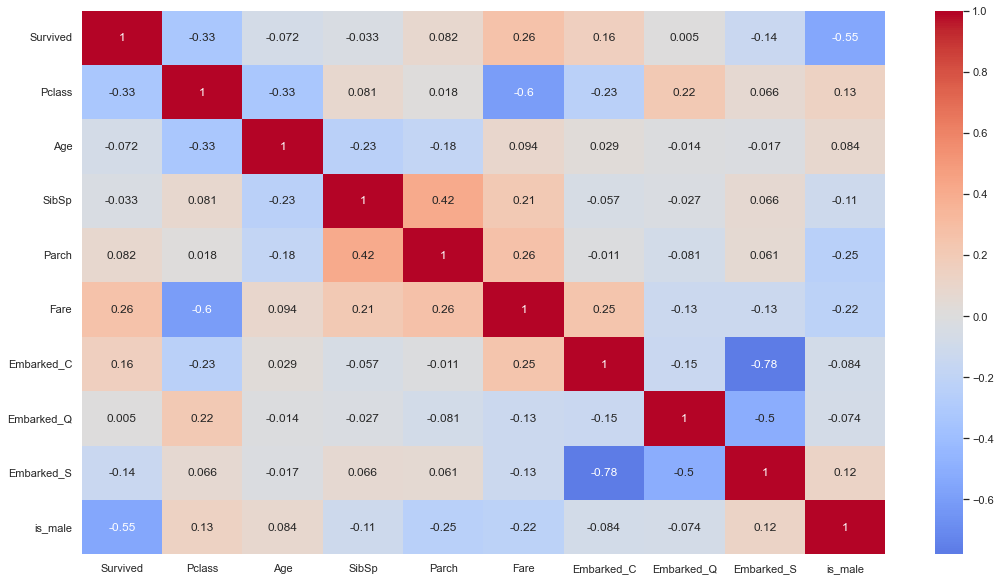

In [98]:
sns.set(rc={'figure.figsize':(18,10)})
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
